In [1]:
import zipfile

In [2]:
with zipfile.ZipFile("python-project-color-detection.zip", "r") as zip_ref:
    zip_ref.extractall()

In [4]:
# Import Libraries.
import pandas as pd 
import numpy as np 
import argparse
import cv2

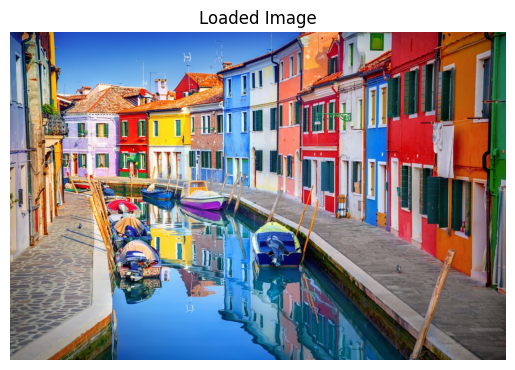

In [18]:
import argparse
import cv2

# Take image from thhe user
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Image Path")
args = vars(ap.parse_args(args=["--image", "colorpic.jpg"])) 

# Read Image with OpenCV
img_path = args["image"]
img = cv2.imread(img_path)

#Declaring global variables
clicked = False
r = g = b = xpos = ypos = 0

# Display the image to see if it has been saved
from matplotlib import pyplot as plt

if img is not None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Loaded Image")
    plt.axis("off")
    plt.show()
else:
    print("Error: Unable to read the image. Check the path.")


In [8]:
#Reading csv file with pandas and giving names to each column
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)
csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [37]:

# Calculate the distance to get color name
"""Calculated using the formula d = abs(Red – ithRedColor) + (Green – ithGreenColor) + (Blue – ithBlueColor)"""
def getColorName(R, G, B):
    minimum = 10_000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if (d<=minimum):
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

#Create the draw function
"""It will calculate the RGB values of the pixel in which we double click"""
def draw_function(event, x, y, flags, param):
    if event == 1:
        global b, g, r, ypos, xpos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

# Set a mouse callback event on a Window.
cv2.namedWindow("image")
cv2.setMouseCallback("image", draw_function)

# Display Image on the Window.
while (1):
    cv2.imshow("image", img)
    if (clicked):
        # Rectangle that displays image, startpoint, endpoint, color, thickness
        cv2.rectangle(img, (20,20), (750,60), (b,g,r), -1)

        #Get color name
        text = getColorName(r,g,b) + "R="+str(r) + "G="+str(g) + "B="+str(b)

        #cv2.putText(image, text, start, font(0-7), font scale, color, thickness, linetype)
        cv2.putText(img, text, (50,50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
        #For light colors, display text in black font
        if (r+g+b>=600):
            cv2.putText(img, text, (50,50), 2, 0.8, (0,0,0), 2, cv2.LINE_AA)
        clicked = False
    
    #Break the loop when the user hits esc key
    if cv2.waitKey(20) & 0xFF==27:
        break
cv2.destroyAllWindows()


KeyboardInterrupt

